In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import stockstats
from pandas_datareader import data as web
from stockstats import StockDataFrame as Sdf

Populating the interactive namespace from numpy and matplotlib


In [3]:
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2017,4,1)
end1 = datetime.datetime(2017,1,1)

In [5]:
df_AAPL = web.DataReader('ADBE', 'yahoo', start, end)

In [6]:
def rsi(data):
    stock_df = Sdf.retype(data)
    data['rsi']=stock_df['rsi_14']
    return data

def EWMA(data, ndays):
    EMA = pd.Series(pd.ewma(data['close'], span = ndays, min_periods = ndays - 1), 
    name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

def signal(data):
    '''
    Signal=100 means BUY,
    Signal=-100 means SELL
    If previous BUY Signal is Already there then don't BUY
    If previous BUY Signal is there then only SELL
    '''
    data['Signal'] = 0

    data['Signal'][(data['EWMA_20'] > data['EWMA_50'])] = 100
    data['Signal'][data['Signal'].shift(1) ==100] = 75
    for i in range(len(data)):
        if (data['EWMA_20'][i] < data['EWMA_50'][i]) & (data['Signal'][i-1]==75):
            data['Signal'][i] = -100
    
    data['Transaction_price'] = 0
    
    data['Transaction_price'][(data['Signal']==100) | (data['Signal'] == -100)] = data['close']
    data['Transaction_price'][(data['Signal']==75)] = data['Transaction_price'].shift(1)
    for i in range(len(data)):
        if data['Signal'][i]==75:
            data['Transaction_price'][i]= data['Transaction_price'][i-1]
    #data['Transaction_price'][(data['Signal'].shift(1)==75) & (data['Signal']==75)] = data['Transaction_price'].shift(1)
            
    data = data.dropna()
    data['Returns'] = 0
    data['Returns'][data['Signal']==-100] = ((data['Transaction_price']/data['Transaction_price'].shift(1)) - 1)*100
    
    data['Cumm Returns'] = 0
    data['Cumm Returns'] = data['Returns'].cumsum()
    return data

In [7]:
df_AAPL = rsi(df_AAPL)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df_AAPL1 = EWMA(df_AAPL, 10)
df_AAPL1 = EWMA(df_AAPL1, 20)
df_AAPL1 = EWMA(df_AAPL1, 50)
df_AAPL1 = signal(df_AAPL1)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=9,adjust=True).mean()
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=20,min_periods=19,adjust=True).mean()
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=50,min_periods=49,adjust=True).mean()
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

In [9]:
df_AAPL2 = df_AAPL1.dropna()

In [12]:
df_AAPL2.head(25)

,open,high,low,close,adj close,volume,close_-1_s,close_-1_d,rs_14,rsi_14,rsi,EWMA_10,EWMA_20,EWMA_50,Signal,Transaction_price,Returns,Cumm Returns
Date,,,,,,,,,,,,,,,,,,
2015-03-13,77.180000,78.059998,76.620003,77.620003,77.620003,2202800,77.400002,0.220001,1.255262,55.659260,55.659260,77.413067,77.014741,75.747592,100,77.620003,0.000000,0.000000
2015-03-16,78.209999,78.589996,77.800003,78.330002,78.330002,1851400,77.620003,0.709999,1.417283,58.631245,58.631245,77.579790,77.140850,75.864709,75,77.620003,0.000000,0.000000
2015-03-17,78.220001,79.870003,78.180000,79.660004,79.660004,5719000,78.330002,1.330002,1.744135,63.558641,63.558641,77.958024,77.382235,76.035783,75,77.620003,0.000000,0.000000
2015-03-18,75.500000,78.320000,74.750000,76.889999,76.889999,10509400,79.660004,-2.770005,1.006367,50.158667,50.158667,77.763832,77.335096,76.074062,75,77.620003,0.000000,0.000000
2015-03-19,76.480003,77.379997,75.290001,77.139999,77.139999,3519200,76.889999,0.250000,1.047480,51.159482,51.159482,77.650405,77.316423,76.121564,75,77.620003,0.000000,0.000000
2015-03-20,77.669998,77.959999,76.809998,77.360001,77.360001,3577600,77.139999,0.220002,1.086444,52.071553,52.071553,77.597603,77.320592,76.176459,75,77.620003,0.000000,0.000000
2015-03-23,77.110001,77.300003,76.339996,76.349998,76.349998,1754100,77.360001,-1.010003,0.910960,47.670293,47.670293,77.370762,77.227777,76.184112,75,77.620003,0.000000,0.000000
2015-03-24,76.110001,76.419998,75.379997,75.449997,75.449997,2782800,76.349998,-0.900001,0.788710,44.093787,44.093787,77.021528,77.057839,76.151895,75,77.620003,0.000000,0.000000
2015-03-25,75.500000,75.589996,73.120003,73.129997,73.129997,3444700,75.449997,-2.320000,0.574633,36.493119,36.493119,76.313969,76.682509,76.019891,75,77.620003,0.000000,0.000000


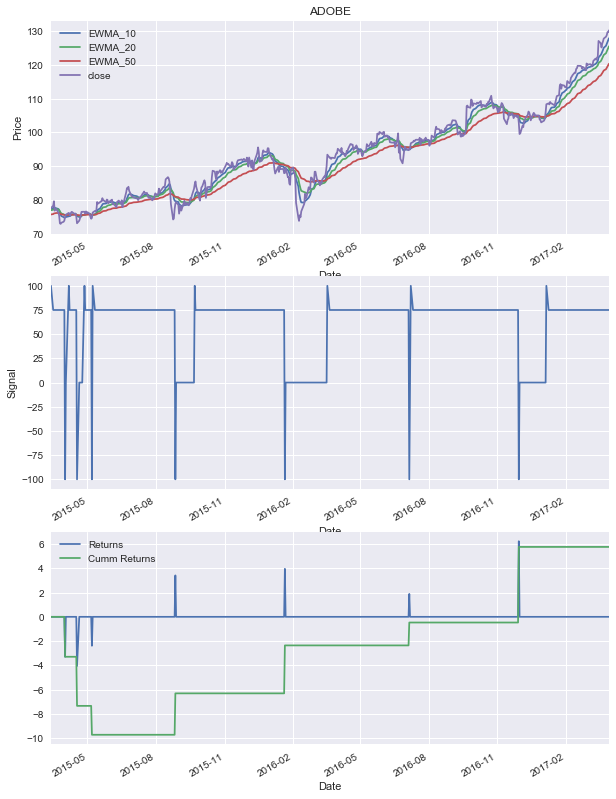

In [11]:
plt.figure(figsize=(10,20))
plt.subplot(411)
df_AAPL2['EWMA_10'].plot()
df_AAPL2['EWMA_20'].plot()
df_AAPL2['EWMA_50'].plot()
df_AAPL2['close'].plot()
plt.ylabel('Price')
plt.title('ADOBE')
plt.legend()

plt.subplot(412)
df_AAPL2['Signal'].plot()
plt.ylabel('Signal')

#plt.subplot(413)
#df_AAPL2['rsi_14'].plot()
#plt.ylabel('RSI')
#plt.axhline(y=70)
#plt.axhline(y=30)

plt.subplot(413)
df_AAPL2['Returns'].plot()
df_AAPL2['Cumm Returns'].plot()
plt.legend()